# CPSC-483: Group Project - RUL (Remaining useful lifetime) with batteries

__________________________________________
#### Authors: 
Nils Heimbach

CWID: 885179317

E-Mail: heimbachnils@csu.fullerton.edu
___________________________________________
Jason Duong

CWID: 

E-Mail: xxx@csu.fullerton.edu
_________________________________________

# Table of content: <a class="TOC" id="TOC"></a>

1. [Importing libraries](#1)
2. [Downloading files (only once)](#2)
3. [Data Understanding](#3)
4. [Data Preprocessing](#4)
5. [Data Modeling](#5)
6. [Data Evaluation and Analysis](#6)

External Links: 
- [Written Paper](www.google.de)
- [GitHub](https://github.com/duong-jason/483_ML_BatteryLife)
- [Website Dataset](https://www.batteryarchive.org/list.html?time=0001)

# 1. Importing libraries <a class="importing libraries" id="1"></a>

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from urllib.error import HTTPError

[Click here to go to the top of the chapter](#1)

[Click here for the table of content](#TOC)

# 2. Downloading files <a class="2" id="2"></a>

In [2]:
# Book Code - https://github.com/ageron/handson-ml3/blob/main/01_the_machine_learning_landscape.ipynb
IMAGES_PATH = Path() / 'images'
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = IMAGES_PATH / f'{fig_id}.{fig_extension}'
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# TODO: verify with partner

def init_path(to=''):
    """Initalizes the path to repository"""
    user = !whoami
    if user == ['jason']:
        path = Path(r'/home/jason/Desktop/483_ML_BatteryLife/') / Path(to.replace("\\", '/'))
    else:
        path = Path(r'C:\Users\heimb\Documents\GitHub\483_ML_BatteryLife/') / Path(to.replace("/", '\\'))
    return path

# Data Consolidation

## Filter/Parse the Data 

In [4]:
def extract_column(dataset, attr, *, pattern=''):
    """
    Returns a list samples of an attribute and
    constrained by some regular expression.
    
    Parameters
    ----------
    dataset -- a csv file
    attr -- an attribute of the dataset 
    regex: the key used to filter specific datapoints (defaults to all)
    """
    df = pd.read_csv(dataset)[attr].squeeze()
    df.replace('/', '-', regex=True, inplace=True)
    return [dp[0] for dp in df.str.findall(fr'^{pattern}.*') if len(dp)]

## Download (Collect/Join), Save, and Load the Data

In [5]:
repos = (r'https://www.batteryarchive.org/data/' + _ + r'_timeseries.csv'
         for _ in extract_column('Input/metadata.csv', 'cell_id', pattern='SNL'))

def load_battery_data(path):
    """
    Downloads the battery data, encoded as a pickle object (*.pkl)
    into the datasets directory.
    
    Data source -- @www.batteryarchive.org
    """
    
    try:
        os.chdir(path)
        data_path = r'Input/battery.pkl'
        if not Path('Input/').is_dir():
            Path('Input').mkdir(parents=True, exist_ok=True)
        if not Path(data_path).is_file():
            df = pd.concat([pd.read_csv(url) for url in repos])
            df.to_pickle(data_path)
            print('Download Complete!')
        return pd.read_pickle(data_path)
    except HTTPError:
        print('Download Failed!')

In [6]:
path = init_path()
battery = load_battery_data(path)

[Click here to go to the top of the chapter](#1)

[Click here for the table of content](#TOC)

# 3. Data Understanding <a class="3" id="3"></a>

In [7]:
def insights_of_df(df):
    """
    Display of the insights of a data frame such as column names, number
    of null/non-null values, percentage null values, number of unique
    values and data types.

    Parameters
    ----------
        df: pandas.DataFrame.dtypes
            The full dataset

    Returns
    -------
        output: pandas.DataFrame.dtypes
            Dataframe with specified columns
    """
    output = []

    # loop through all columns in the DataFrame
    for col in df.columns:
        nonNull  = len(df) - np.sum(pd.isna(df[col]))
        nullValues = np.sum(pd.isna(df[col]))
        percentNA = nullValues / (nullValues + nonNull)
        unique = df[col].nunique()
        colType = str(df[col].dtype)

        # Append variable to the output list
        output.append([col, nonNull, nullValues, percentNA, unique, colType])

    output = pd.DataFrame(output)
    output.columns = ['colName', 'non-null values', 'null values', 
                      'percentNA', 'unique', 'dtype']
    return output

In [8]:
# pickle_path = r"C:\Users\heimb\Documents\GitHub\483_ML_BatteryLife\Input\battery.pkl"
pickle_path = r"/home/jason/Desktop/483_ML_BatteryLife/Input/battery.pkl"
battery = pd.read_pickle(pickle_path)

In [9]:
battery.head()

,Date_Time,Test_Time (s),Cycle_Index,Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Environment_Temperature (C),Cell_Temperature (C)
0,2018-08-08 14:48:41.010197,10.010,1.0,0.0,3.227,0.0,0.0,0.0,0.0,24.565,25.542
1,2018-08-08 14:48:51.025272,20.025,1.0,0.0,3.227,0.0,0.0,0.0,0.0,24.610,25.360
2,2018-08-08 14:49:01.040232,30.040,1.0,0.0,3.227,0.0,0.0,0.0,0.0,24.490,25.239
3,2018-08-08 14:49:11.063254,40.063,1.0,0.0,3.227,0.0,0.0,0.0,0.0,24.565,25.391
4,2018-08-08 14:49:21.078242,50.078,1.0,0.0,3.227,0.0,0.0,0.0,0.0,24.641,25.391


In [10]:
battery.shape

(10586956, 11)

In [11]:
battery.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10586956 entries, 0 to 80104
Data columns (total 11 columns):
 #   Column                       Non-Null Count     Dtype  
---  ------                       --------------     -----  
 0   Date_Time                    10586956 non-null  object 
 1   Test_Time (s)                10586956 non-null  float64
 2   Cycle_Index                  10586956 non-null  float64
 3   Current (A)                  10586956 non-null  float64
 4   Voltage (V)                  10586956 non-null  float64
 5   Charge_Capacity (Ah)         10586956 non-null  float64
 6   Discharge_Capacity (Ah)      10586956 non-null  float64
 7   Charge_Energy (Wh)           10586956 non-null  float64
 8   Discharge_Energy (Wh)        10586956 non-null  float64
 9   Environment_Temperature (C)  10478287 non-null  float64
 10  Cell_Temperature (C)         10478287 non-null  float64
dtypes: float64(10), object(1)
memory usage: 969.3+ MB


In [12]:
insights_of_df(battery)

,colName,non-null values,null values,percentNA,unique,dtype
0,Date_Time,10586956,0,0.000000,10586884,object
1,Test_Time (s),10586956,0,0.000000,10582505,float64
2,Cycle_Index,10586956,0,0.000000,12918,float64
3,Current (A),10586956,0,0.000000,1899,float64
4,Voltage (V),10586956,0,0.000000,2324,float64
5,Charge_Capacity (Ah),10586956,0,0.000000,5659,float64
6,Discharge_Capacity (Ah),10586956,0,0.000000,5051,float64
7,Charge_Energy (Wh),10586956,0,0.000000,17780,float64
8,Discharge_Energy (Wh),10586956,0,0.000000,14515,float64
9,Environment_Temperature (C),10478287,108669,0.010264,7434,float64


In [13]:
if 'Date_Time' in battery.columns:
    battery = battery.drop(['Date_Time'], axis=1)

In [14]:
# replaycing whitespaces, and nan-values and doing data understanding again
battery.replace(' ', np.NaN, inplace=True)
battery['Environment_Temperature (C)'].replace(np.NaN, battery['Environment_Temperature (C)'].mean(), inplace=True)
battery['Cell_Temperature (C)'].replace(np.NaN, battery['Cell_Temperature (C)'].mean(), inplace=True)

In [15]:
battery.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10586956 entries, 0 to 80104
Data columns (total 10 columns):
 #   Column                       Non-Null Count     Dtype  
---  ------                       --------------     -----  
 0   Test_Time (s)                10586956 non-null  float64
 1   Cycle_Index                  10586956 non-null  float64
 2   Current (A)                  10586956 non-null  float64
 3   Voltage (V)                  10586956 non-null  float64
 4   Charge_Capacity (Ah)         10586956 non-null  float64
 5   Discharge_Capacity (Ah)      10586956 non-null  float64
 6   Charge_Energy (Wh)           10586956 non-null  float64
 7   Discharge_Energy (Wh)        10586956 non-null  float64
 8   Environment_Temperature (C)  10586956 non-null  float64
 9   Cell_Temperature (C)         10586956 non-null  float64
dtypes: float64(10)
memory usage: 888.5 MB


In [16]:
battery.head()

,Test_Time (s),Cycle_Index,Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Environment_Temperature (C),Cell_Temperature (C)
0,10.010,1.0,0.0,3.227,0.0,0.0,0.0,0.0,24.565,25.542
1,20.025,1.0,0.0,3.227,0.0,0.0,0.0,0.0,24.610,25.360
2,30.040,1.0,0.0,3.227,0.0,0.0,0.0,0.0,24.490,25.239
3,40.063,1.0,0.0,3.227,0.0,0.0,0.0,0.0,24.565,25.391
4,50.078,1.0,0.0,3.227,0.0,0.0,0.0,0.0,24.641,25.391


In [17]:
battery.describe()

,Test_Time (s),Cycle_Index,Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Environment_Temperature (C),Cell_Temperature (C)
count,1.058696e+07,1.058696e+07,1.058696e+07,1.058696e+07,1.058696e+07,1.058696e+07,1.058696e+07,1.058696e+07,1.058696e+07,1.058696e+07
mean,1.158402e+07,2.777388e+03,-4.256987e-01,3.616005e+00,1.198281e+00,4.214976e-01,4.544155e+00,1.524862e+00,2.542835e+01,2.668735e+01
std,1.042899e+07,3.080156e+03,1.802850e+00,3.149657e-01,8.543732e-01,6.546661e-01,3.337333e+00,2.361195e+00,3.422912e+00,4.011079e+00
min,2.100000e-02,1.000000e+00,-9.998000e+00,-4.646000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367100e+01,5.605000e+00
25%,2.870255e+06,3.750000e+02,-1.500000e+00,3.473000e+00,6.000000e-01,0.000000e+00,2.210000e+00,0.000000e+00,2.451500e+01,2.468000e+01
50%,7.636733e+06,1.265000e+03,-1.499000e+00,3.612000e+00,6.500000e-01,1.140000e-01,2.422000e+00,4.130000e-01,2.476800e+01,2.548300e+01
75%,1.931641e+07,4.596000e+03,1.499000e+00,3.786000e+00,1.933000e+00,5.240000e-01,7.257000e+00,1.865000e+00,2.506600e+01,2.669800e+01
max,4.035570e+07,1.291800e+04,9.999000e+00,9.983000e+00,6.385000e+00,6.342000e+00,2.472200e+01,2.132400e+01,3.601700e+01,5.536100e+01


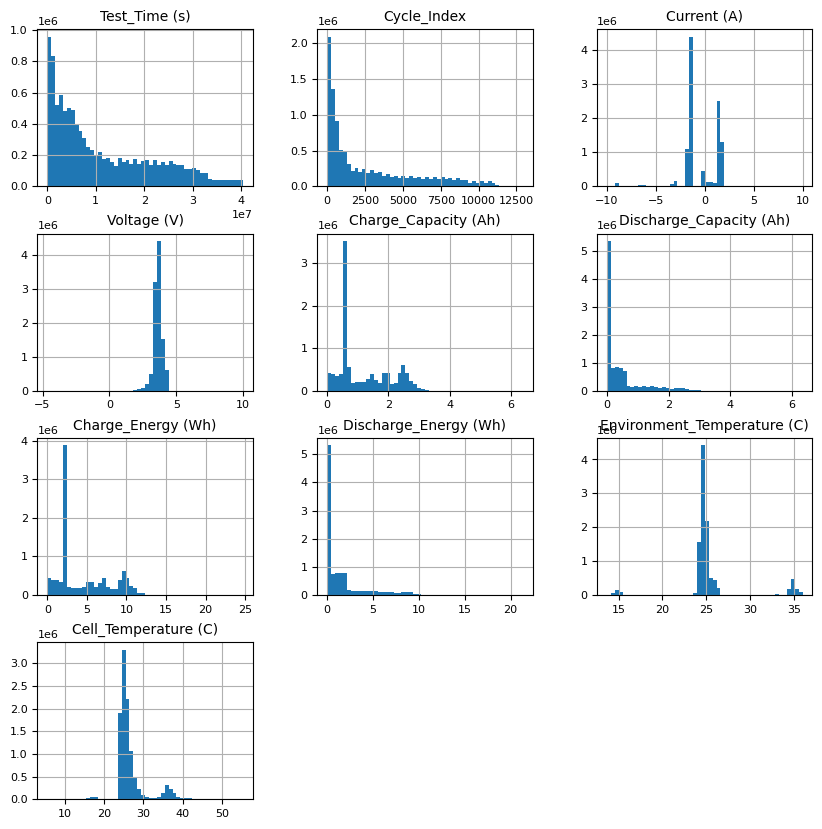

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=10)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

battery.hist(bins=50, figsize=(10, 10))
plt.show()

In [19]:
insights_of_df(battery)

,colName,non-null values,null values,percentNA,unique,dtype
0,Test_Time (s),10586956,0,0.0,10582505,float64
1,Cycle_Index,10586956,0,0.0,12918,float64
2,Current (A),10586956,0,0.0,1899,float64
3,Voltage (V),10586956,0,0.0,2324,float64
4,Charge_Capacity (Ah),10586956,0,0.0,5659,float64
5,Discharge_Capacity (Ah),10586956,0,0.0,5051,float64
6,Charge_Energy (Wh),10586956,0,0.0,17780,float64
7,Discharge_Energy (Wh),10586956,0,0.0,14515,float64
8,Environment_Temperature (C),10586956,0,0.0,7435,float64
9,Cell_Temperature (C),10586956,0,0.0,35811,float64


[Click here to go to the top of the chapter](#1)

[Click here for the table of content](#TOC)

# 4. Data Preprocessing <a class="4" id="4"></a>

## Feature Selection - Principal Component Analysis (PCA)

In [20]:
# Reduce number of instances
small_battery = battery.groupby(battery['Cycle_Index']).mean()

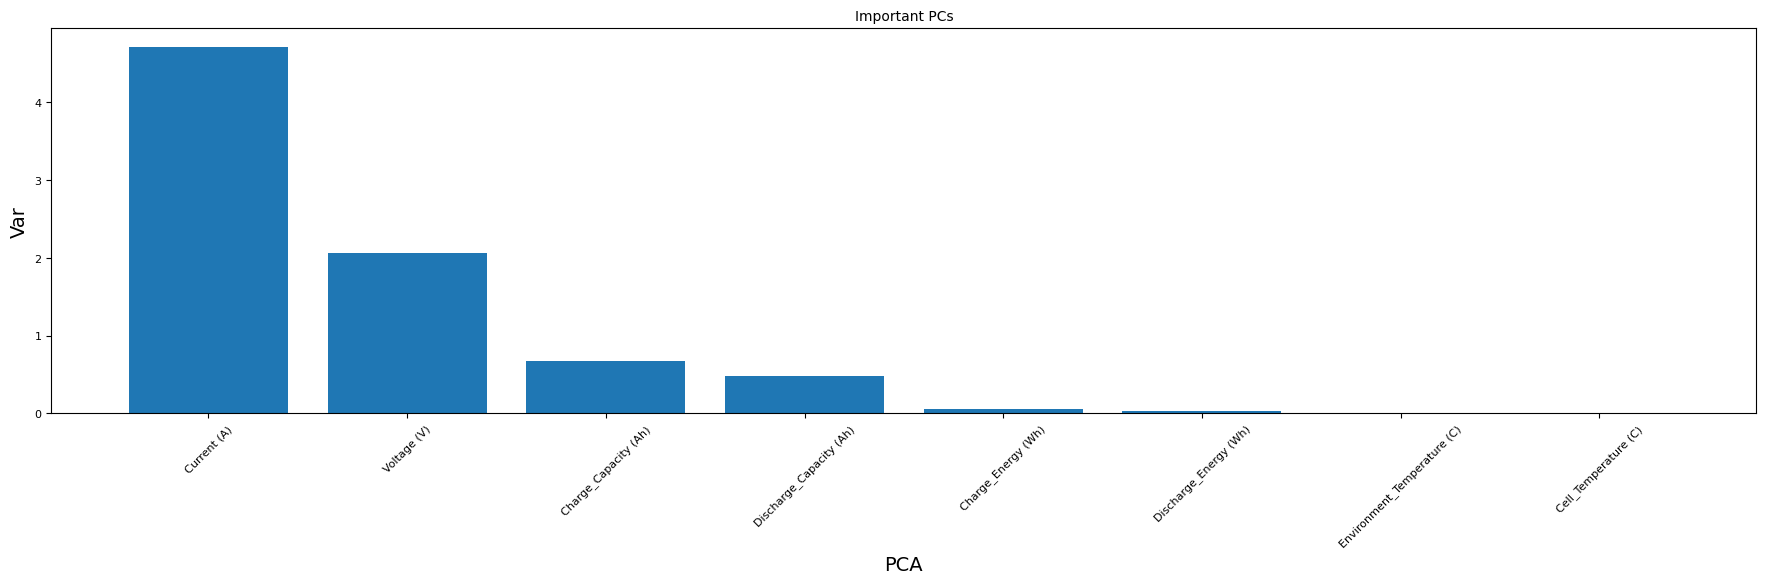

In [21]:
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = small_battery.iloc[:, 1:]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(X)

# Plot a bar chart describing the variance of each feature
features = range(pca.n_components_)
features2 = X.columns

# Define bar chart size
_ = plt.figure(figsize=(22, 5))

# Define actual bar chart
_ = plt.bar(features2, pca.explained_variance_)

# Labels, Titles und Ticks of the bar chart 
_ = plt.xlabel('PCA')
_ = plt.ylabel('Var')
_ = plt.xticks(features2, rotation=45)
_ = plt.title("Important PCs")

# Display the bar chart
plt.show()

In [22]:
# Drop irrelevant features from PCA
small_battery = small_battery.drop(
    ['Environment_Temperature (C)', 'Cell_Temperature (C)'], axis=1)

In [23]:
# Save reduced dataset to disk
path = init_path(to='Output/small_battery.pkl')
small_battery.to_pickle(path)
small_battery = pd.read_pickle(path)

In [24]:
small_battery.head()

,Test_Time (s),Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh)
Cycle_Index,,,,,,,
1.0,8012.953033,-0.130489,3.639419,2.181459,0.847905,8.355348,3.140880
2.0,23962.777793,-0.081403,3.622213,2.207153,0.822433,8.386281,3.046498
3.0,40073.483876,-0.085322,3.623808,2.209341,0.825945,8.398237,3.062268
4.0,57051.378709,-0.032475,3.653823,2.682474,1.294900,10.184272,4.468194
5.0,74141.080340,-0.042759,3.618769,1.510732,0.424351,5.653533,1.494498


In [25]:
small_battery.describe()

,Test_Time (s),Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh)
count,1.291800e+04,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000
mean,2.201754e+07,-0.767380,3.535539,0.692323,0.260311,2.580169,0.916844
std,9.584733e+06,0.319681,0.088758,0.328973,0.125359,1.282932,0.481321
min,8.012953e+03,-1.158843,2.720919,0.000000,0.000000,0.000000,0.000000
25%,1.556041e+07,-1.041662,3.461593,0.551585,0.235788,2.017619,0.799726
50%,2.285778e+07,-0.960393,3.549964,0.560448,0.240172,2.075163,0.845278
75%,3.009639e+07,-0.441588,3.614032,0.720836,0.266767,2.694191,0.958759
max,3.954501e+07,0.175056,3.732059,2.682474,1.294900,10.184272,4.468194


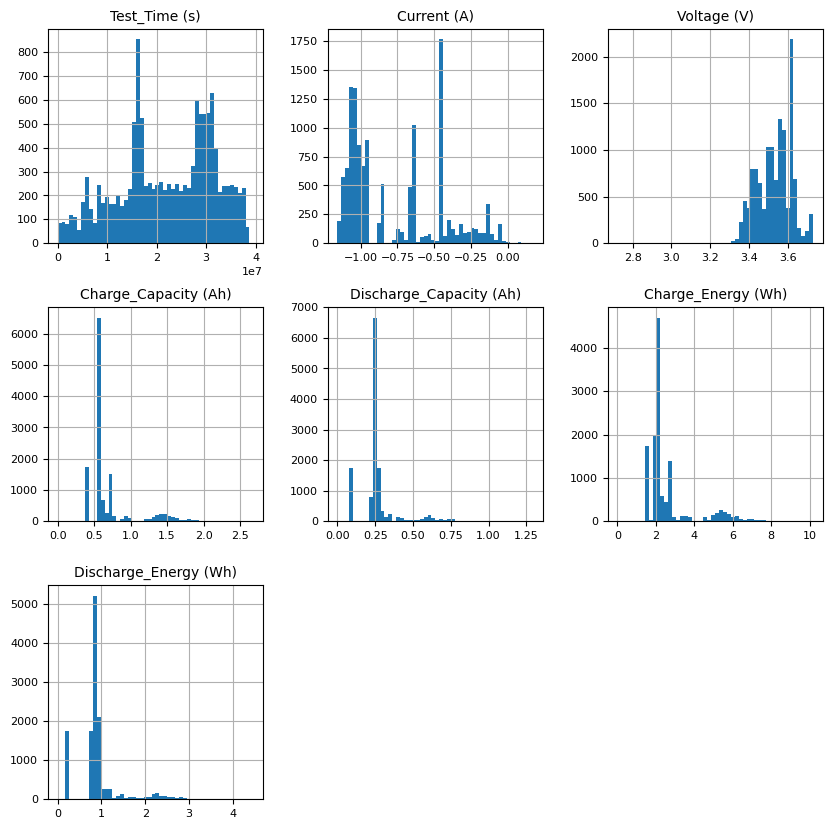

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=10)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

small_battery.hist(bins=50, figsize=(10, 10))
plt.show()

## Correlation Matrix

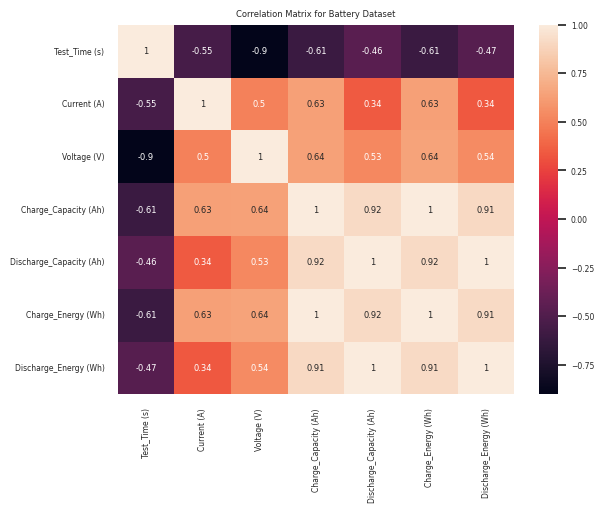

In [27]:
sns.set(font_scale=0.5)
corr_matrix = small_battery.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Battery Dataset')
plt.show()

[Click here to go to the top of the chapter](#1)

[Click here for the table of content](#TOC)

# 5. Data Modeling <a class="5" id="5"></a>

In [28]:
# Add RUL feature
small_battery['RUL'] = 19175 - small_battery.index
small_battery

,Test_Time (s),Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),RUL
Cycle_Index,,,,,,,,
1.0,8.012953e+03,-0.130489,3.639419,2.181459,0.847905,8.355348,3.140880,19174.0
2.0,2.396278e+04,-0.081403,3.622213,2.207153,0.822433,8.386281,3.046498,19173.0
3.0,4.007348e+04,-0.085322,3.623808,2.209341,0.825945,8.398237,3.062268,19172.0
4.0,5.705138e+04,-0.032475,3.653823,2.682474,1.294900,10.184272,4.468194,19171.0
5.0,7.414108e+04,-0.042759,3.618769,1.510732,0.424351,5.653533,1.494498,19170.0
...,...,...,...,...,...,...,...,...
12914.0,3.164295e+07,-0.441529,3.370294,0.405176,0.088118,1.431824,0.242882,6261.0
12915.0,3.164523e+07,-0.441529,3.369000,0.405176,0.088118,1.431588,0.242824,6260.0
12916.0,3.164751e+07,-0.441529,3.367529,0.405176,0.088118,1.431176,0.242824,6259.0


In [29]:
small_battery

,Test_Time (s),Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),RUL
Cycle_Index,,,,,,,,
1.0,8.012953e+03,-0.130489,3.639419,2.181459,0.847905,8.355348,3.140880,19174.0
2.0,2.396278e+04,-0.081403,3.622213,2.207153,0.822433,8.386281,3.046498,19173.0
3.0,4.007348e+04,-0.085322,3.623808,2.209341,0.825945,8.398237,3.062268,19172.0
4.0,5.705138e+04,-0.032475,3.653823,2.682474,1.294900,10.184272,4.468194,19171.0
5.0,7.414108e+04,-0.042759,3.618769,1.510732,0.424351,5.653533,1.494498,19170.0
...,...,...,...,...,...,...,...,...
12914.0,3.164295e+07,-0.441529,3.370294,0.405176,0.088118,1.431824,0.242882,6261.0
12915.0,3.164523e+07,-0.441529,3.369000,0.405176,0.088118,1.431588,0.242824,6260.0
12916.0,3.164751e+07,-0.441529,3.367529,0.405176,0.088118,1.431176,0.242824,6259.0


## Train-Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_full, y_full = battery.iloc[:, :-1], battery.iloc[:, -1]
X_full_train, X_full_test, y_full_train, y_full_test = \
    train_test_split(X_full, y_full, test_size=0.33, random_state=42)

In [32]:
X_red, y_red = small_battery.iloc[:, :-1], small_battery.iloc[:, -1]
X_red_train, X_red_test, y_red_train, y_red_test = \
    train_test_split(X_red, y_red, test_size=0.33, random_state=42)

## Model 1: Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

### Full Dataset

In [34]:
lr_full = LinearRegression()
lr_full.fit(X_full_train, y_full_train)
lr_full.score(X_full_train, y_full_train)

0.7629258889716696

In [35]:
lr_full_pred = lr_full.predict(X_full_test)
lr_full.score(X_full_test, y_full_test)

0.7619645325910375

### Reduced Dataset

In [36]:
lr_red = LinearRegression()
lr_red.fit(X_red_train, y_red_train)
lr_red.score(X_red_train, y_red_train)

0.9615948170180265

In [37]:
lr_red_pred = lr_red.predict(X_red_test)
lr_red.score(X_red_test, y_red_test)

0.9606982024127768

In [38]:
pickle.dump(lr_full, open('Output/lr_full.model', 'wb'))
pickle.dump(lr_red, open('Output/lr_reduced.model', 'wb'))

# load the model from disk
lr_red = pickle.load(open('Output/lr_reduced.model', 'rb'))
result = lr_red.score(X_red_test, y_red_test)
print(result)

0.9606982024127768


## Model 2: Huber Regression

In [39]:
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor()
huber.fit(X_red_train, y_red_train)
huber.score(X_red_train, y_red_train)

-4.222596324719397

In [40]:
huber_pred = huber.predict(X_red_test)
huber.score(X_red_test, y_red_test)

-4.332616527299209

In [41]:
pickle.dump(huber, open('Output/huber.model', 'wb'))

# load the model from disk
huber = pickle.load(open('Output/huber.model', 'rb'))
result = huber.score(X_red_test, y_red_test)
print(result)

-4.332616527299209


## Model 3: Theil Sen Regression

In [42]:
from sklearn.linear_model import TheilSenRegressor

theilsen = TheilSenRegressor(random_state=42)
theilsen.fit(X_red_train, y_red_train)
theilsen_pred = theilsen.predict(X_red_test)
theilsen.score(X_red_train, y_red_train)

0.6178275064399941

In [43]:
pickle.dump(huber, open('Output/theilsen.model', 'wb'))

# load the model from disk
theilsen = pickle.load(open('Output/theilsen.model', 'rb'))
result = theilsen.score(X_red_test, y_red_test)
print(result)

-4.332616527299209


## Model 4: RANSAC Regression

In [44]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(random_state=42)
ransac.fit(X_red_train, y_red_train)
ransac.score(X_red_train, y_red_train)

0.22292593613976697

In [45]:
pickle.dump(huber, open('Output/ransac.model', 'wb'))

# load the model from disk
ransac = pickle.load(open('Output/ransac.model', 'rb'))
result = ransac.score(X_red_test, y_red_test)
print(result)

-4.332616527299209


## Model 6: Ensemble Learning

In [46]:
from sklearn.ensemble import VotingRegressor

model_1 = LinearRegression()
model_2 = HuberRegressor()
model_3 = TheilSenRegressor(random_state=42)
model_4 = RANSACRegressor(random_state=42)


vote_reg = VotingRegressor([('linear', model_1),
                            ('huber', model_2),
                            ('theilsen', model_3),
                            ('ransac', model_4)])
vote_reg.fit(X_red_train, y_red_train)
vote_reg_pred = vote_reg.predict(X_red_test)
vote_reg.score(X_red_test, y_red_test)

0.6506838170722382

In [47]:
pickle.dump(vote_reg, open('Output/vote_reg.model', 'wb'))

# load the model from disk
vote_reg = pickle.load(open('Output/vote_reg.model', 'rb'))
result = vote_reg.score(X_red_test, y_red_test)
print(result)

0.6506838170722382


## Model 7: Parallelized Random Forest (My Version)

In [70]:
from mpitree.random_forest import *
from os.path import exists

In [49]:
if exists('Output/mpitree_random_forest.model'):
    mpitree_rf = pickle.load(open('Output/mpitree_random_forest.model', 'rb'))
else:
    mpitree_rf = RandomForest(n_estimators=100, n_sample=int(np.log2(len(X_red_train))))
    mpitree_rf.fit(X_red_train, y_red_train)
    pickle.dump(mpitree_rf, open('Output/mpitree_random_forest.model', 'wb'))

mpitree_rf

Test_Time (s) (Branch: None)
	Charge_Capacity (Ah) (Branch: 28922060.419538252)
		Charge_Capacity (Ah) (Branch: 0.5685392084189502)
			Test_Time (s) (Branch: 0.5123629594348486)
				Test_Time (s) (Branch: 26802308.059093423)
					14388.0 (Branch: 23901785.555806667)
					13996.0 (Branch: 23901785.555806667)
				10640.0 (Branch: 26802308.059093423)
			14842.0 (Branch: 0.5123629594348486)
		Test_Time (s) (Branch: 0.5685392084189502)
			18447.0 (Branch: 13633812.662927262)
			16728.0 (Branch: 13633812.662927262)
	Test_Time (s) (Branch: 28922060.419538252)
		Test_Time (s) (Branch: 43573980.037944436)
			Test_Time (s) (Branch: 33046773.77885023)
				6005.0 (Branch: 29761486.55557551)
				10098.0 (Branch: 29761486.55557551)
			Test_Time (s) (Branch: 33046773.77885023)
				4459.0 (Branch: 36285668.755575314)
				Test_Time (s) (Branch: 36285668.755575314)
					4034.0 (Branch: 37063710.22814583)
					3946.0 (Branch: 37063710.22814583)
		Test_Time (s) (Branch: 43573980.037944436)
			559.0 (Branc

In [71]:
X_red_train, X_red_validate, y_red_train, y_red_validate = \
    train_test_split(X_red_train, y_red_train, test_size=0.33, random_state=42)

In [74]:
score = []
n_values = list(range(100, 150))

for n in n_values:
    mpitree_rf = RandomForest(n_estimators=n, n_sample=int(np.log2(len(X_red_train))))
    mpitree_rf.fit(X_red_train, y_red_train)
    score.append(mpitree_rf.score(X_red_validate, y_red_validate))

100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
best n= 148


In [77]:
print(n_values[np.argmin(score)])

126



The optimal number of trees is 126


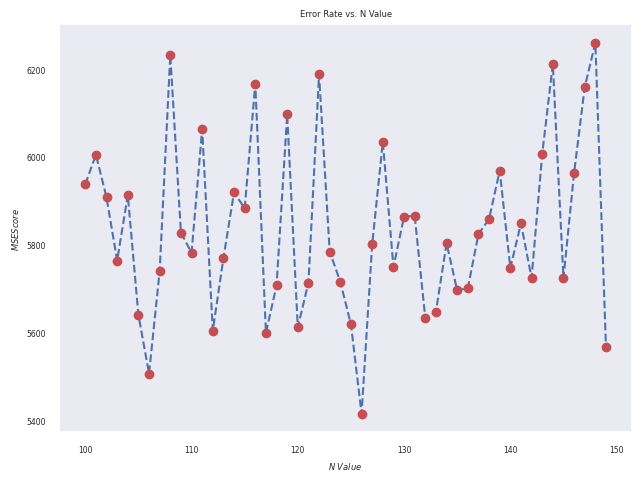

In [76]:
print(f"\nThe optimal number of trees is {n_values[np.argmin(score)]}")

plt.title("Error Rate vs. N Value")
plt.xlabel("$N\ Value$")
plt.ylabel("$MSE Score$", rotation=90)
plt.grid()
plt.plot(n_values, score, 'b--')
plt.plot(n_values, score, 'ro')
save_fig('elbow_plot')
plt.show()

## Model 8: Random Forest (Sklearn)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

if exists('Output/sklearn_random_forest.model'):
    sklearn_rf = pickle.load(open('Output/sklearn_random_forest.model', 'rb'))
else:
    sklearn_rf = RandomForestRegressor(n_estimators=100)
    sklearn_rf.fit(X_red_train, y_red_train)
    pickle.dump(sklearn_rf, open('Output/sklearn_random_forest.model', 'wb'))

score = sklearn_rf.score(X_red_test, y_red_test)
print(f"MSE Score: {score:.2f}")

MSE Score: 1.00


# 6. Data Evaluation and Analysis <a class="6" id="6"></a>

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

In [ ]:
# def regression_metrics(y_true, y_pred):
#     """
#     Calculate the regression metrics such as mean absolute error, mean
#     squared error, root mean squared error, mean absolute percentage
#     error and R-squared.

#     Parameters
#     ----------
#         y_true: pandas.Series
#             The true values of the target variable
#         y_pred: pandas.Series
#             The predicted values of the target variable

#     Returns
#     -------
#         output: 4 metrics: mae, mse, rmse, r2
#     """
#     # Calculate the metrics
#     mae = mean_absolute_error(y_true, y_pred)
#     mse = mean_squared_error(y_true, y_pred)
#     rmse = np.sqrt(mse)
#     #mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#     r2 = r2_score(y_true, y_pred)

#     # return the metrics
#     return mae, mse, rmse, r2

In [ ]:
# pred_dict = {"LinRe":lr_red_pred, "HuberReg":huber_pred, "TheilsenReg":theilsen_pred, "Ensemble":vote_reg_pred}

# df_scores = pd.DataFrame(columns=["Name","R2", "MSE", "RMSE", "MAE"])

# for key, value in pred_dict.items(): 
#     # calculating regression metrics
#     mae, mse, rmse, r2 = regression_metrics(y_red_test, value)
#     # adding model and metrics to df
#     new_dict = {"Name":key+"_train","R2":r2, "MSE":mse, "RMSE":rmse, "MAE":mae}
#     df_scores = df_scores.append(new_dict, ignore_index=True)
    
# df_scores

In [ ]:
models = ["Linear Regression", "Huber Regression", "Theil Sen Regression", "RANSAC Regression", "Voter Regressor", "mpitree_rf", "sklearn_rf"]
predictors = [lr_red, huber, theilsen, ransac, vote_reg, mpitree_rf, sklearn_rf]
metrics = [r2_score, mean_squared_error, mean_absolute_error, explained_variance_score]

data = []

for i, (model, predictor) in enumerate(zip(models, predictors)):
    data.append([model])
    for j, metric in enumerate(metrics):
        if predictor is mpitree_rf:
            y_hat = predictor.predict_all(X_red_test)
        else:
            y_hat = predictor.predict(X_red_test)
        data[i].append(metric(y_red_test, y_hat))

pd.DataFrame(data, columns=["model"] + [m.__name__ for m in metrics])

,model,r2_score,mean_squared_error,mean_absolute_error,explained_variance_score
0,Linear Regression,0.855824,4.370133e+06,1093.172082,0.855866
1,Huber Regression,-1.310290,7.002720e+07,6841.906835,-1.148481
2,Theil Sen Regression,-1.310290,7.002720e+07,6841.906835,-1.148481
3,RANSAC Regression,-1.310290,7.002720e+07,6841.906835,-1.148481
4,Voter Regressor,0.793762,6.251269e+06,1884.356792,0.798701
5,mpitree_rf,-4.461390,1.655402e+08,11755.382381,-4.411132
6,sklearn_rf,0.997237,8.374131e+04,39.929894,0.997237


In [ ]:
import statsmodels.api as sm

result = sm.OLS(y_red_train, X_red_train).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                    RUL   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                          6.877e+04
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                        0.00
Time:                        14:37:02   Log-Likelihood:                     -1.1443e+05
No. Observations:               12847   AIC:                                  2.289e+05
Df Residuals:                   12840   BIC:                                  2.289e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------